### selected chords

selecting the chords for aim 2 of the grant

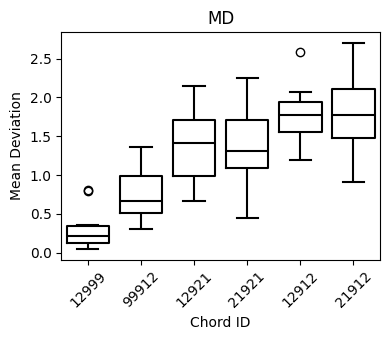

12999 vs 99912: t=-7.373, p=0.0000
12999 vs 12921: t=-8.811, p=0.0000
12999 vs 21921: t=-7.874, p=0.0000
12999 vs 12912: t=-20.877, p=0.0000
12999 vs 21912: t=-12.128, p=0.0000
99912 vs 12999: t=7.373, p=0.0000
99912 vs 12921: t=-4.937, p=0.0003
99912 vs 21921: t=-4.532, p=0.0006
99912 vs 12912: t=-12.646, p=0.0000
99912 vs 21912: t=-8.370, p=0.0000
12921 vs 12999: t=8.811, p=0.0000
12921 vs 99912: t=4.937, p=0.0003
12921 vs 21921: t=-0.097, p=0.9244
12921 vs 12912: t=-4.428, p=0.0007
12921 vs 21912: t=-3.649, p=0.0029
21921 vs 12999: t=7.874, p=0.0000
21921 vs 99912: t=4.532, p=0.0006
21921 vs 12921: t=0.097, p=0.9244
21921 vs 12912: t=-3.147, p=0.0077
21921 vs 21912: t=-3.397, p=0.0048
12912 vs 12999: t=20.877, p=0.0000
12912 vs 99912: t=12.646, p=0.0000
12912 vs 12921: t=4.428, p=0.0007
12912 vs 21921: t=3.147, p=0.0077
12912 vs 21912: t=-0.189, p=0.8532
21912 vs 12999: t=12.128, p=0.0000
21912 vs 99912: t=8.370, p=0.0000
21912 vs 12921: t=3.649, p=0.0029
21912 vs 21921: t=3.397, p=

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

D = pd.read_table('./analysis/efc1_chord.tsv')
D['MD'] = pd.to_numeric(D['MD'], errors='coerce')
D['ET'] = pd.to_numeric(D['ET'], errors='coerce')
D['RT'] = pd.to_numeric(D['RT'], errors='coerce')


chords = [12999, 99912, 12921, 21921, 12912, 21912]
df = {'chord': [], 'sn': [], 'MD': [], 'ET': [], 'RT': []}

for chord in chords:
    D_tmp = D[(D['chordID'] == chord) & (D['sess']>=3)].copy()
    D_tmp = D_tmp.groupby('sn').agg({'MD': 'mean', 'ET': 'mean', 'RT': 'mean'}).reset_index()

    MD = D_tmp['MD']
    ET = D_tmp['ET']
    RT = D_tmp['RT']

    df['chord'] += [chord] * len(D_tmp)
    df['sn'] += D_tmp['sn'].tolist()
    df['MD'] += MD.tolist()
    df['ET'] += ET.tolist()
    df['RT'] += RT.tolist()

df = pd.DataFrame(df)
df

# boxplot MD per chord:
fig, ax = plt.subplots(figsize=(4, 3.5))
sns.boxplot(x='chord', y='MD', data=df, order=chords, ax=ax, fill=False, color='black')
ax.set_title('MD')
ax.set_xlabel('Chord ID')
ax.set_ylabel('Mean Deviation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'/Users/aghavamp/Downloads/compare_chord.pdf', bbox_inches="tight")
plt.show()

# ttest between chords:
from scipy.stats import ttest_rel
for chord1 in chords:
    for chord2 in chords:
        if chord1 != chord2:
            MD1 = df[df['chord'] == chord1]['MD']
            MD2 = df[df['chord'] == chord2]['MD']
            t_stat, p_value = ttest_rel(MD1, MD2)
            print(f'{chord1} vs {chord2}: t={t_stat:.3f}, p={p_value:.4f}')




### all chords with middle-finger in rest zone

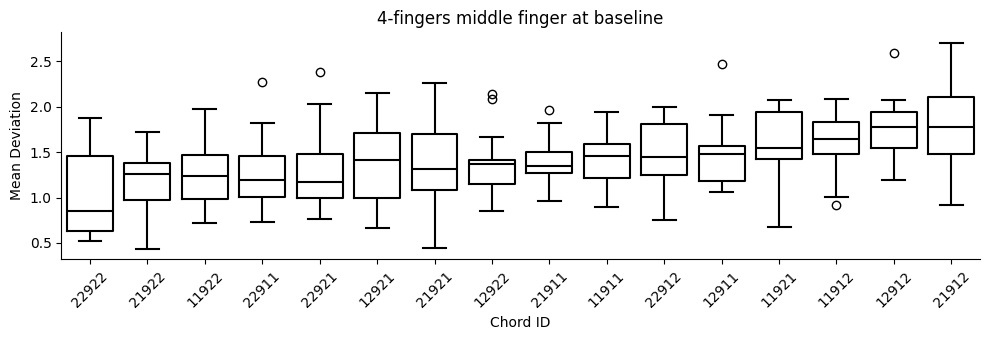

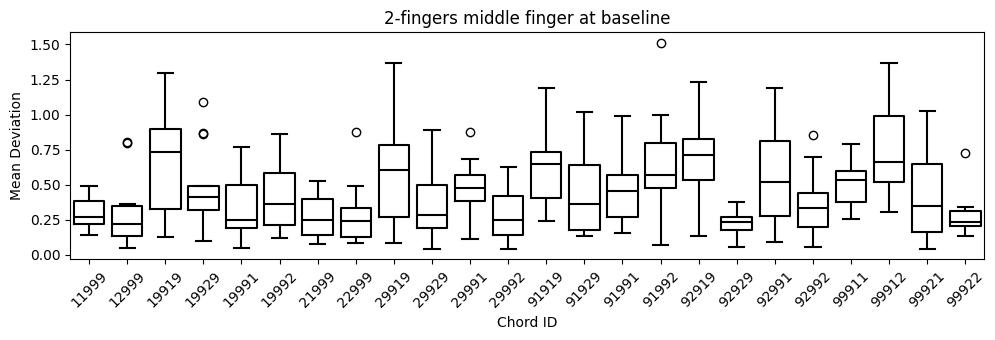

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

D = pd.read_table('./analysis/efc1_chord.tsv')
D['MD'] = pd.to_numeric(D['MD'], errors='coerce')
D['ET'] = pd.to_numeric(D['ET'], errors='coerce')
D['RT'] = pd.to_numeric(D['RT'], errors='coerce')


# The digits 'x' can represent
valid_digits = ['1', '2', '9']
chords = []
# product() generates the Cartesian product 
for p in product(valid_digits, repeat=4):
    chord = f"{p[0]}{p[1]}9{p[2]}{p[3]}"
    chords.append(int(chord))
chords.remove(99999)

df = {'chord': [], 'nfing':[], 'sn': [], 'MD': [], 'ET': [], 'RT': []}

for chord in chords:
    D_tmp = D[(D['chordID'] == chord) & (D['sess']>=3)].copy()
    D_tmp = D_tmp.groupby('sn').agg({'MD': 'mean', 'ET': 'mean', 'RT': 'mean'}).reset_index()

    MD = D_tmp['MD']
    ET = D_tmp['ET']
    RT = D_tmp['RT']

    df['chord'] += [chord] * len(D_tmp)
    df['nfing'] += [5-str(chord).count('9')] * len(D_tmp)
    df['sn'] += D_tmp['sn'].tolist()
    df['MD'] += MD.tolist()
    df['ET'] += ET.tolist()
    df['RT'] += RT.tolist()

df = pd.DataFrame(df)
# save df:
df.to_csv('/Users/aghavamp/Downloads/middle_finger_relax.csv', index=False)

# boxplot MD 4-fing chords:
D4 = df[df['nfing'] == 4].copy()
# sort chords based on mean MD:
chord_order = D4.groupby('chord')['MD'].mean().sort_values().index
D4['chord'] = pd.Categorical(D4['chord'], categories=chord_order, ordered=True)
fig, ax = plt.subplots(figsize=(10, 3.5))
sns.boxplot(x='chord', y='MD', data=D4, ax=ax, fill=False, color='black')
ax.set_title('4-fingers middle finger at baseline')
ax.set_xlabel('Chord ID')
ax.set_ylabel('Mean Deviation')
plt.xticks(rotation=45)
plt.tight_layout()
sns.despine()
plt.savefig(f'/Users/aghavamp/Downloads/four_finger.pdf', bbox_inches="tight")
plt.show()

# boxplot MD 2-fing chords:
D2 = df[df['nfing'] == 2].copy()
fig, ax = plt.subplots(figsize=(10, 3.5))
sns.boxplot(x='chord', y='MD', data=D2, ax=ax, fill=False, color='black')
ax.set_title('2-fingers middle finger at baseline')
ax.set_xlabel('Chord ID')
ax.set_ylabel('Mean Deviation')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig(f'/Users/aghavamp/Downloads/compare_chord.pdf', bbox_inches="tight")
plt.show()

